In [11]:
import requests
import pandas as pd
import datetime

In [13]:
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [15]:
lat=18.520430
lon=73.856743

In [17]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [19]:
response = requests.get(api_url)
weather_data = response.json()

In [21]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [23]:
weather_data['list'][0]

{'dt': 1728464400,
 'main': {'temp': 299.64,
  'feels_like': 299.64,
  'temp_min': 299.64,
  'temp_max': 300.24,
  'pressure': 1011,
  'sea_level': 1011,
  'grnd_level': 948,
  'humidity': 71,
  'temp_kf': -0.6},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'clouds': {'all': 100},
 'wind': {'speed': 1.97, 'deg': 77, 'gust': 2.79},
 'visibility': 10000,
 'pop': 0.75,
 'rain': {'3h': 1.65},
 'sys': {'pod': 'd'},
 'dt_txt': '2024-10-09 09:00:00'}

In [25]:
weather_data['list'][0]['weather'][0]['description']

'light rain'

In [29]:
temperatures = [item['main']['temp'] for item in weather_data['list']] #it will extract all values (40)and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [31]:
weather_df = pd.DataFrame({
'Timestamp': timestamps,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [33]:
weather_df.set_index('Timestamp', inplace=True)

In [35]:
max_temp = weather_df['Temperature'].max()

In [37]:
max_temp

303.57

In [39]:
weather_df.fillna(0, inplace=True)

In [41]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x) 

In [ ]:
weather_df

In [47]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

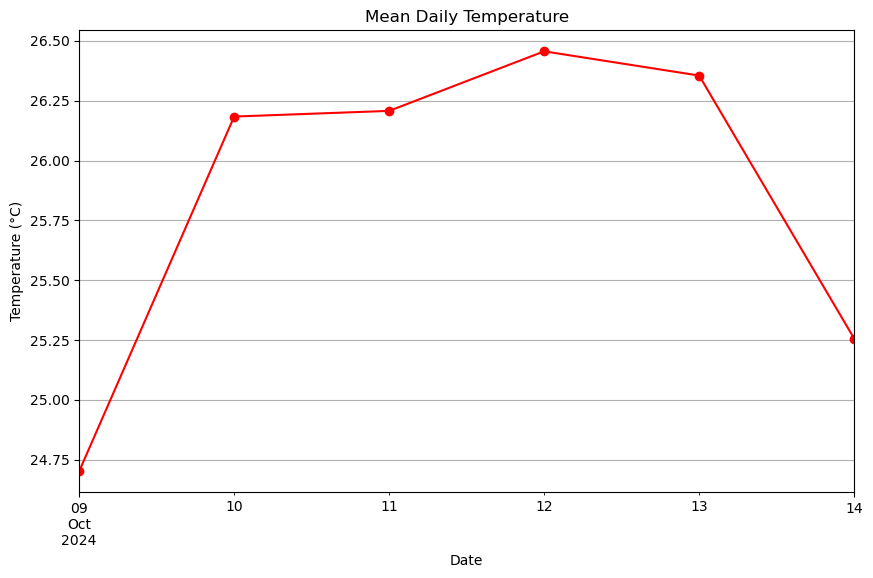

In [51]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

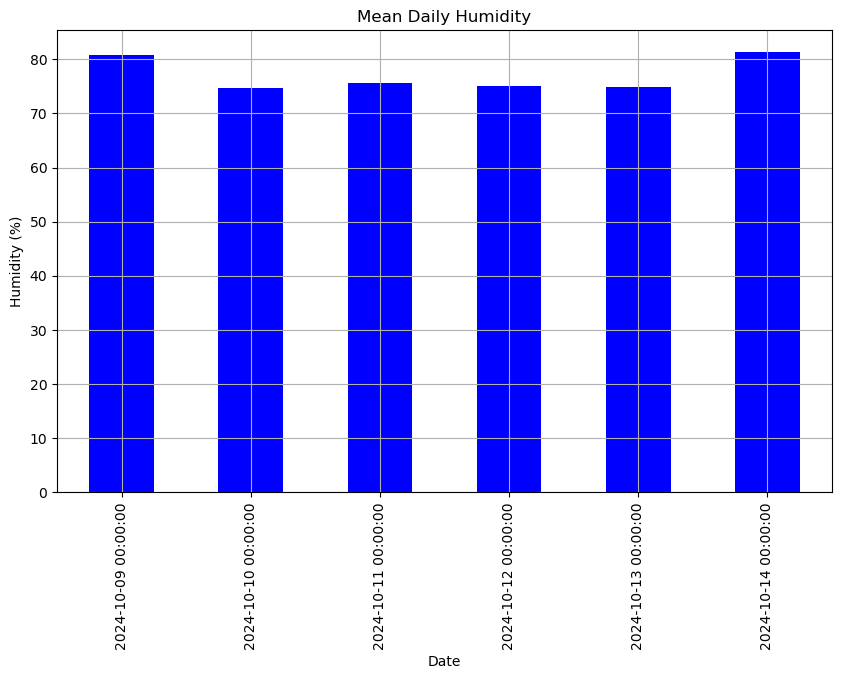

In [55]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

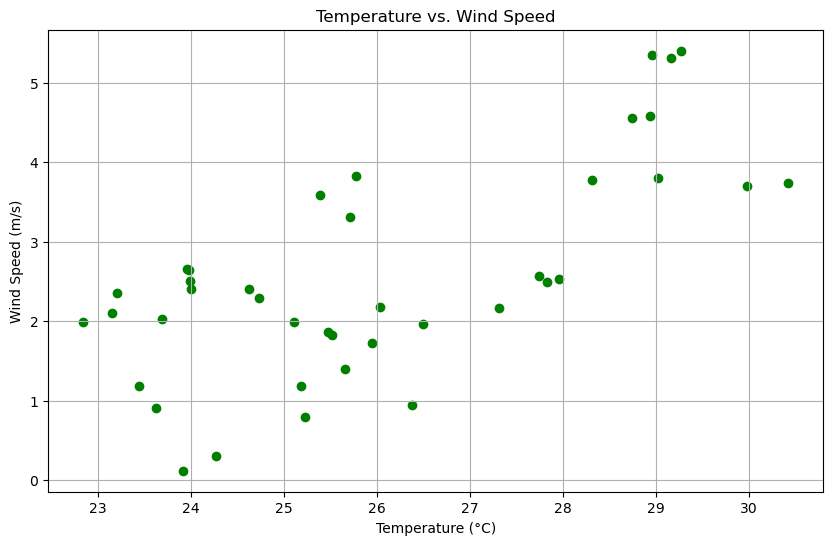

In [57]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show() 

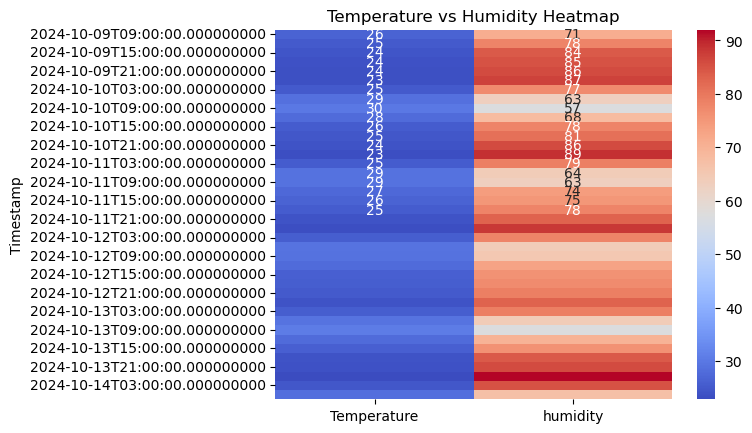

In [59]:
###Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

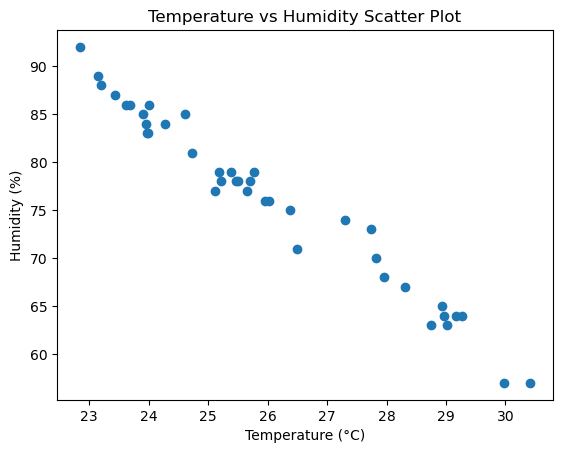

In [61]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [69]:
###Geospatial Map
import requests
import pandas as pd
import geopandas as gpd
import folium

In [71]:
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [73]:
locations = ['London', 'Paris', 'New York']

In [91]:
weather_data_list = [] 

In [93]:
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'
    
    # Send a GET request to the API
    response = requests.get(api_url)
    weather_data = response.json()
    
    # Extract relevant weather attributes
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']
    
    # Append the location's weather data to the list
    weather_data_list.append({
        'Location': location,
        'Temperature': temperature,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Create a DataFrame from the list of weather data
weather_df = pd.DataFrame(weather_data_list)

In [97]:

# Create a DataFrame from the list of weather data
weather_df = pd.DataFrame(weather_data_list)

# Load a world map shapefile using geopandas
# For demonstration purposes, we'll create a simple GeoDataFrame
# In practice, replace this with a real dataset
geometry = gpd.points_from_xy([0, 2.3488, -74.0060], [51.5085, 48.8534, 40.7143])  # Example coordinates
world_map = gpd.GeoDataFrame({
    'Location': ['London', 'Paris', 'New York'],
    'geometry': geometry
})

# Merge the weather data with the world map based on location
weather_map = world_map.merge(weather_df, on='Location')

# Create a folium map centered around the mean latitude and longitude of all locations
map_center = [weather_df['Latitude'].mean(), weather_df['Longitude'].mean()]
weather_map_folium = folium.Map(location=map_center, zoom_start=2)

# Add weather markers to the folium map
for index, row in weather_map.iterrows():
    location = [row['Latitude'], row['Longitude']]
    temperature = row['Temperature']
    marker_text = f'Temperature: {temperature} K'
    
    folium.Marker(location, popup=marker_text, icon=folium.Icon(icon='cloud', color='red')).add_to(weather_map_folium)

# Display the folium map
weather_map_folium